### Statistical Analysis of Business Data
 - Dataset provided by PGP-DSBA-UTA-SEP21-D
 - Code & Analysis - Randall Gann


## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
from IPython.display import display_html

<h5 style='color:red;font-size:30px;font-family:Georgia;text-align:center;'><strong>&#128301;Explore the Data&#128301;</strong></h5>

### Reading the Data into a DataFrame

In [2]:
# reading the dataset abtest.csv
df = pd.read_csv('abtest.csv')
df.head().style.set_properties(**{'background-color': 'black', 'color': 'white', 'border-color': 'black',
                                 'font-size': '11.5pt', 'width': 200})


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.480000,no,Spanish
1,546468,treatment,new,7.130000,yes,English
2,546462,treatment,new,4.400000,no,Spanish
3,546567,control,old,3.020000,no,French
4,546459,treatment,new,4.750000,yes,Spanish


In [3]:
# the shape of the dataset
df.shape

(100, 6)

- 100 rows
- 6 columns

In [4]:
# the dimensions of the dataset
df.ndim

2

In [5]:
# the size of the dataset
df.size

600

- 600 elements in the dataframe

In [6]:
# the columns we have in the dataset
df.columns

Index(['user_id', 'group', 'landing_page', 'time_spent_on_the_page',
       'converted', 'language_preferred'],
      dtype='object')

In [7]:
# rename columns into more user friendly names
feature_labels = ['User ID', 'Group', 'Landing Page', 'Time Spent On Page(Minutes)', 'Converted', 'Preferred Language']
col_names = list(df)
d = dict(zip(col_names, feature_labels))
df = df.rename(columns=d)

In [8]:
# the dtypes we have in the dataset
df.dtypes

User ID                          int64
Group                           object
Landing Page                    object
Time Spent On Page(Minutes)    float64
Converted                       object
Preferred Language              object
dtype: object

In [9]:
# the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   User ID                      100 non-null    int64  
 1   Group                        100 non-null    object 
 2   Landing Page                 100 non-null    object 
 3   Time Spent On Page(Minutes)  100 non-null    float64
 4   Converted                    100 non-null    object 
 5   Preferred Language           100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


- group, landing page, converted, preferred language object types - we will change these below
- user_id - int64
- time_spent_on_page - float64

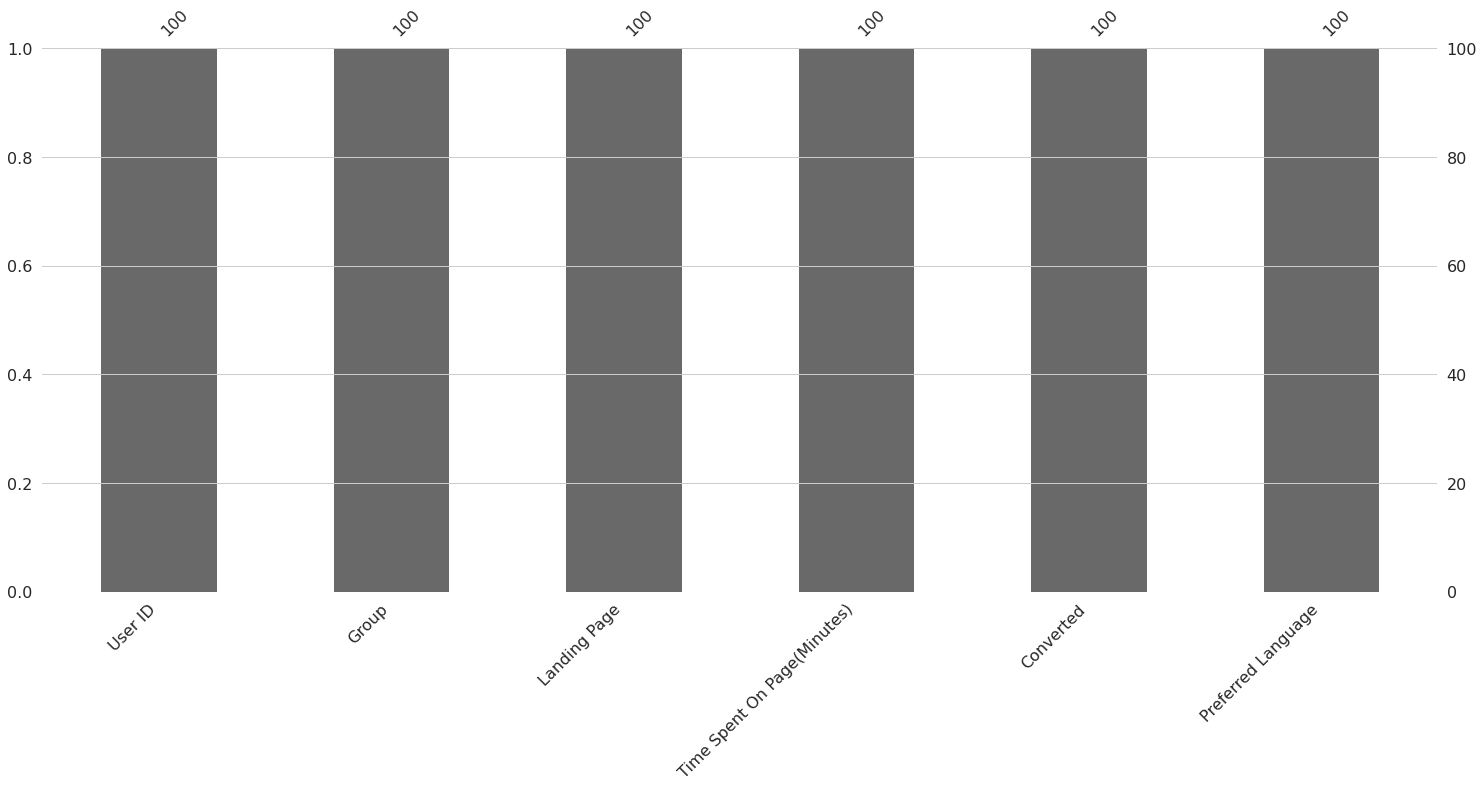

In [10]:
# checking for missing values
import missingno as msno
msno.bar(df);

- no missing values

In [11]:
# are all the user_id's unique?
len(df['User ID'].unique())

100

- all observations are from unique user id's

In [12]:
# as 'best practice' we convert the object datatypes to category

# create a copy of the dataframe to preserve the original
e_news = df.copy()

e_news['Group'] = e_news['Group'].astype('category')
e_news['Landing Page'] = e_news['Landing Page'].astype('category')
e_news['Converted'] = e_news['Converted'].astype('category')
e_news['Preferred Language'] = e_news['Preferred Language'].astype('category')
e_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   User ID                      100 non-null    int64   
 1   Group                        100 non-null    category
 2   Landing Page                 100 non-null    category
 3   Time Spent On Page(Minutes)  100 non-null    float64 
 4   Converted                    100 non-null    category
 5   Preferred Language           100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


In [13]:
# verify that 'Group' and 'Landing Page' perfectly reflect the same bucket of users

control_df = e_news[e_news['Group']=='control'].drop(columns=['Converted','Preferred Language','Time Spent On Page(Minutes)'])
new_df = e_news[e_news['Landing Page']=='new'].drop(columns=['Converted','Preferred Language','Time Spent On Page(Minutes)'])

control_styler = control_df.style.set_table_attributes("style='display:inline'").set_caption('control')
new_styler = new_df.style.set_table_attributes("style='display:inline'").set_caption('new')

space = "\xa0" * 10
display_html(control_styler._repr_html_()+ space + new_styler._repr_html_(), raw=True)

,User ID,Group,Landing Page
0,546592,control,old
3,546567,control,old
5,546558,control,old
7,546581,control,old
9,546548,control,old
10,546588,control,old
11,546546,control,old
14,546578,control,old
17,546555,control,old
18,546493,control,old


- group and landing page give us the same info, all users in control were delivered the old page and all users in the treatment were delivered the new
- one column would need to be dropped when building a model

In [14]:
e_news['Converted'].value_counts()

yes    54
no     46
Name: Converted, dtype: int64

- 54 users subscribed
- 46 did not subscribe

In [15]:
e_news['Preferred Language'].value_counts()

French     34
Spanish    34
English    32
Name: Preferred Language, dtype: int64

- the 3 language options all have a fairly equal representation in the data
- 34 prefer French, 34 prefer Spanish and 32 prefer English

In [16]:

e_news['Time Spent On Page(Minutes)'].describe()

count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: Time Spent On Page(Minutes), dtype: float64

- Mean time spent on page is 5:37
- Standard deviation is 2:37
- Range is from 19 seconds to 10 minutes

<h5 style='color:red;font-size:30px;font-family:Georgia;text-align:center;'><strong>&#128269;Data Overview Observations&#128269;</strong></h5>

<div style='font-family:Georgia;color:#000000;font-size:90%;text-align:center;border-radius:10px;border-style:dotted;border-width:5px;border-color:#323232;'>
<br>
    1. <strong>SHAPE / DIMENSIONS / SIZE</strong><br>
    <br>
    The data consists of 100 observations(rows) and 6 columns, making it 2 dimensions with a total of 100*6=600 elements.<br>
    <br>
    2. <strong>COLUMNS</strong><br>
    <p style='text-align:left;padding-left:20px;padding-right:20px'><strong>USER_ID</strong> - Unique 6-digit int64 type numbers representing the individual user observed.<br>
    <br>
       <strong>Group</strong> - Each observation is categorized into two buckets, 'control' or 'treatment' Group.  The two Groups are equally represented in the data set with each Group comprising 50 observations.<br>
    <br>
        <strong>LANDING PAGE</strong> - As with the Group column, Landing Page categorizes the data into 'new' and 'old' depending if the user was delivered the new landing page or the old.  This column is redundant providing the same info as the Group column where all users in the control Group were delivered the old landing page and all users in the treatment Group were delivered the new page.<br>
    <br>
        <strong>TIME SPENT ON PAGE</strong> - Time in minutes spent by the user on the respective page represented as a float64 datatype.<br>
    <br>
        <strong>CONVERTED</strong> - 'Yes/No' categorical datatype indicating if the user was converted to a subscriber.<br>
    <br>
        <strong>LANGUAGE PREFERRED</strong> - Categorical datatype specifiying the user preferred language.  Three languages are represented in the data; English, Spanish and French.<br>
    <br>
    </p>
    3. <strong>CONVERTED DATATYPES</strong><br>
    <br>
        'Group', 'Landing Page', 'converted' and Language Preferred' were converted from 'object' type to 'category' for memory optimization.<br>
    <br>
    4. <strong>MISSING VALUES</strong><br>
    <br>
        There are no missing values in the dataset.<br>
    <br>
    5. <strong>SUMMARY STATS</strong><br>
    <br>
        'Time Spent On Page(Minutes)' is the only numeric column with useful summary stats.<br>
    <br>
        Average time spent on page is 5 minutes<br>
        Standard deviation is 2 minutes<br>
        Range is 19 seconds to 11 minutes<br>
    <br>
</div>

### Univariate Analysis

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, h=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 3, 5))
    else:
        plt.figure(figsize=(n + 3, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values(), hue=h)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage
    if h:
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.show()  # show the plot

### Time Spent On Page

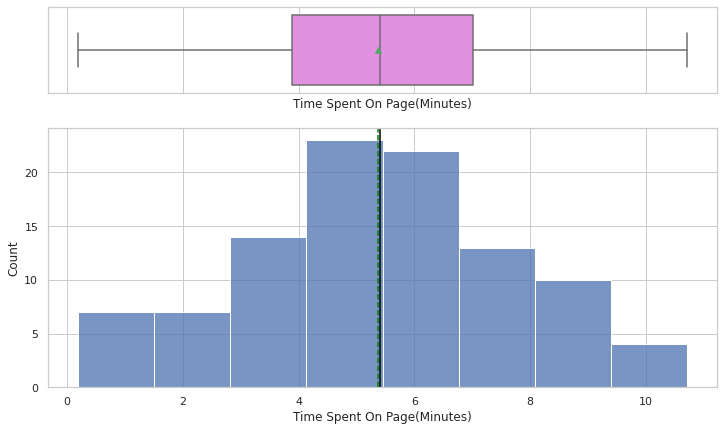

In [19]:
# analysis of time spent on page
histogram_boxplot(df, 'Time Spent On Page(Minutes)')

**Obeservations**
- Time spent on page follows a normal distribution
- Mean and median are roughly equal
- No outliers 

### Group

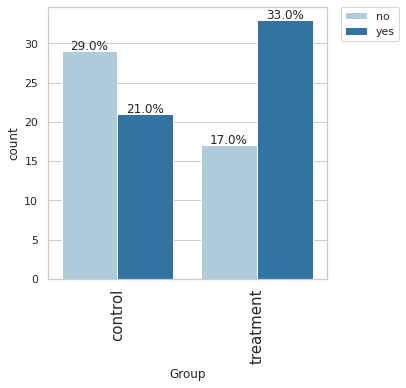

In [20]:
# analysis of Group 
labeled_barplot(e_news, 'Group', h='Converted', perc=True)

**Obeservations**
- Equal number of control and treatment observations
- More treatment group users were converted

### Landing Page

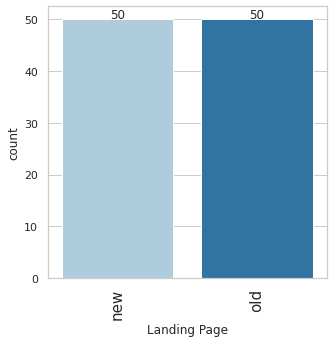

In [21]:
# analysis of landing page
labeled_barplot(e_news, 'Landing Page')

**Obeservations**
- Equal number of new page and old page observations

### Preferred Language

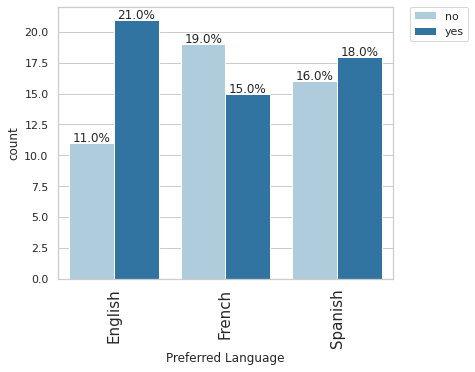

In [22]:
# analysis of preferred language
labeled_barplot(e_news, 'Preferred Language', h='Converted', perc=True)


**Obeservations**
- French and Spanish have the most number of observations at 34 each
- English also well represented in the dataset at 32 observations

### Converted

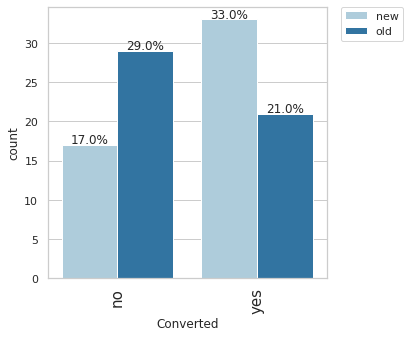

In [23]:
# analysis of converted
labeled_barplot(e_news, 'Converted', perc=True, h='Landing Page')

**Obeservations**
- The majority of all observations resulted in a conversion
- 54% of users converted while only 46% did not convert
- The new landing page accounted for the greatest percentage of conversions at 33%

### Bivariate Analysis

### Time vs. Group

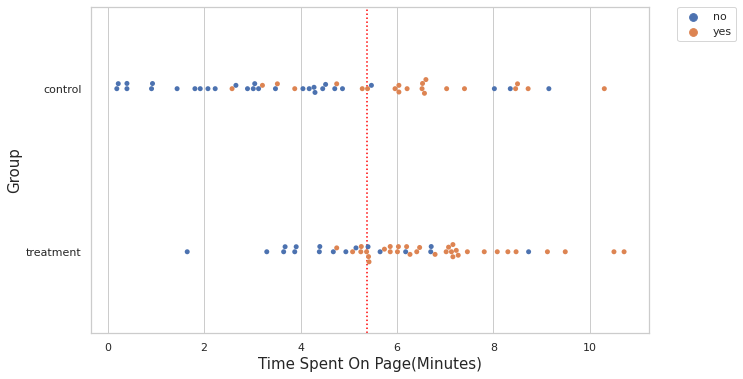

In [24]:
plt.figure(figsize=(10, 6))
sns.swarmplot(y=e_news['Group'], x=e_news['Time Spent On Page(Minutes)'], hue=e_news['Converted'])
plt.xlabel('Time Spent On Page(Minutes)', size=15)
plt.ylabel('Group', size=15)
plt.axvline(x=e_news['Time Spent On Page(Minutes)'].mean(), color='red', linestyle=':')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

- Users in the treatment group appear to spend more time on the page and to convert more often, we will check if statistically true below.

### Time vs. Landing Page

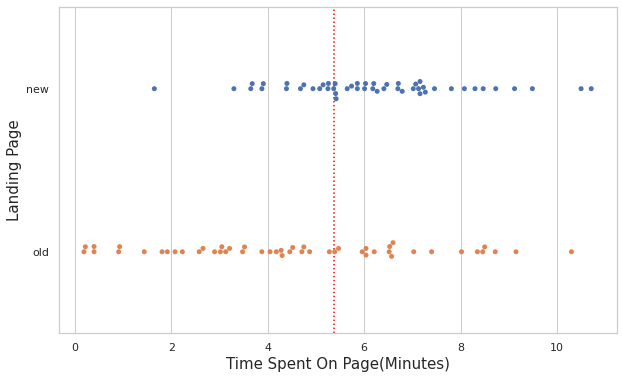

In [25]:
plt.figure(figsize=(10, 6))
sns.swarmplot(y=e_news['Landing Page'], x=e_news['Time Spent On Page(Minutes)']);
plt.xlabel('Time Spent On Page(Minutes)', size=15)
plt.ylabel('Landing Page', size=15)
plt.axvline(x=e_news['Time Spent On Page(Minutes)'].mean(), color='red', linestyle=':');

- As expected this gives use the same info as the graph above

### Time vs. Converted

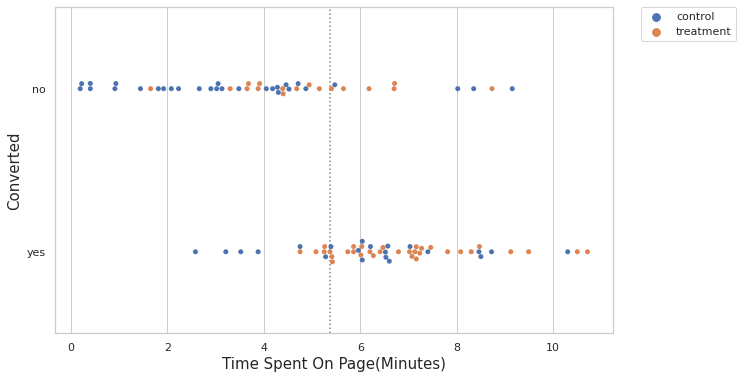

In [26]:
plt.figure(figsize=(10, 6))
sns.swarmplot(y=e_news['Converted'], x=e_news['Time Spent On Page(Minutes)'], hue=e_news['Group'])
plt.xlabel('Time Spent On Page(Minutes)', size=15)
plt.ylabel('Converted', size=15)
plt.axvline(x=e_news['Time Spent On Page(Minutes)'].mean(), color='grey', linestyle=':')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

- The majority of observations that did convert spent an above average amount of time on the page.

### Time vs. Preferred Language

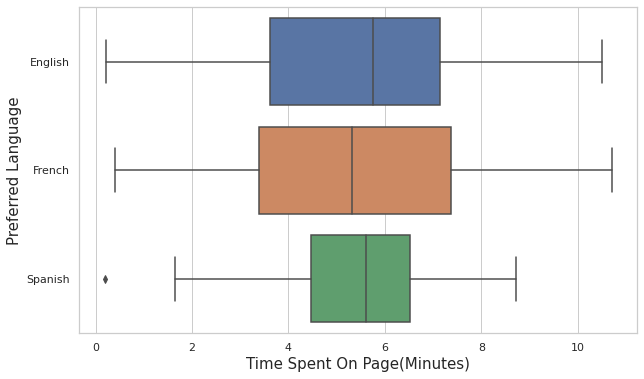

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Preferred Language', x='Time Spent On Page(Minutes)', data=e_news)
plt.xlabel('Time Spent On Page(Minutes)',size=15)
plt.ylabel('Preferred Language',size=15);

- English speakers spend slightly more time on either page on average then both French and Spanish speakers
- Majority of all users spend 3.5 - 7 minutes on the page

### Converted vs. Landing Page/Preferred Language

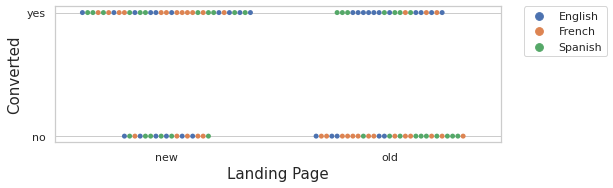

In [28]:
plt.figure(figsize=(8, 2.5))
sns.swarmplot(y=e_news['Converted'], x=e_news['Landing Page'], hue=e_news['Preferred Language'])
plt.xlabel('Landing Page', size=15)
plt.ylabel('Converted', size=15)
plt.axvline(x=e_news['Time Spent On Page(Minutes)'].mean(), color='grey', linestyle=':')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

- Of users delivered the new page a greater percentage did convert.
- Of users delivered the old page a greater precentage did not convert.
- Language preference does not seem to be a dominate factor in conversion on either page.

<h5 style='color:red;font-size:30px;font-family:Georgia;text-align:center;'><strong>&#128269;EDA Observations&#128269;</strong></h5>

<div style='font-family:Georgia;color:#000000;font-size:90%;text-align:left;border-radius:10px;border-style:dotted;border-width:5px;border-color:#323232;padding-left:20px;padding-right:20px'>
<br>
    <p style='text-align:center'><strong>Time Spent On Page - Univariate & Bivariate Analysis</strong></p><br>
    <br>
    Time spent on page follows a normal distribution with the mean and median being equal and with no outliers.<br>
    <br>
    <li><strong>Time vs. Group/Converted</strong> - The graphs suggest that users in the 'treatment' group, being delivered the 'new' landing page, spend more time on the page and convert more often.</li>
    <li><strong>Time vs. Converted</strong> - The users who converted to subscribers spent an above average amount of time on the page.  This would suggest that as the amount of time spent on the page increases, conversions would increase.</li>
    <li><strong>Time vs. Preferred Language</strong> - English speakers spend the most amount of time on the page on average.  Majority of users spend between 3.5 to 7 minuest on the page.</li><br>
    <p style='text-align:center'><strong>Univariate Analysis</strong></p><br>
    <br>
    <strong>Group / Landing Page</strong> - There are an equal number of observations in the control and treatment groups.  The treament group has the greatest percentage of conversions.<br>
    <br>
     <strong>Converted</strong> - 54% of all observations converted.  The 'new' landing page accounted for the greatest percentage of conversions at 33%.<br>
    <br>
        <strong>Preferred Language</strong> - All three language preferences are well represented in the dataset.  French and Spanish account for 34 observations each and English comes in a close second with 32 observations.  English speakers were the most likely to convert with a conversion rate of 21% and they spend the greatest amount of time on either page on average.  Preferred Language does not seem to be a dominate factor in determining if a user will convert or not, all languages are fairly equally represented in both conversions and non-conversions on either page.<br>
    <br>
</div>

### Perform Visual Analysis

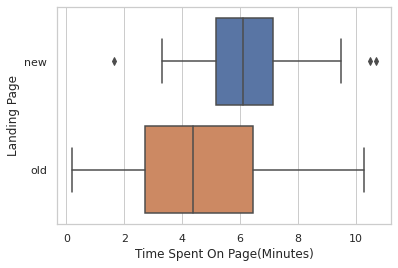

In [29]:
sns.boxplot(y='Landing Page', x='Time Spent On Page(Minutes)', data=e_news);

### Define the null and alternate hypotheses

$H_0: \mu = 4.53$

$H_1: \mu > 4.53$

### Select Appropriate test

Two Independent Sample T-Test

### Decide the significance level

$\alpha = 0.05$

### Collect and prepare data

In [30]:
# get the sample means and standard deviations for old and new pages
old_df = e_news[e_news['Landing Page'] == 'old']
old_avg = round(old_df['Time Spent On Page(Minutes)'].mean(), 2)
print(f'Average time spent on the old page is {old_avg}')

new_df = e_news[e_news['Landing Page'] == 'new']
new_avg = round(new_df['Time Spent On Page(Minutes)'].mean(), 2)
print(f'Average time spent on the new page is {new_avg}')

old_std = round(old_df['Time Spent On Page(Minutes)'].std(), 2)
print(f'Standard Deviation of time spent on the old page is {old_std}')

new_std = round(new_df['Time Spent On Page(Minutes)'].std(), 2)
print(f'Standard Deviation of time spent on the new page is {new_std}')

Average time spent on the old page is 4.53
Average time spent on the new page is 6.22
Standard Deviation of time spent on the old page is 2.58
Standard Deviation of time spent on the new page is 1.82


### Calculate the p-value

In [44]:
# import the necessary test and get pvalue
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(new_df['Time Spent On Page(Minutes)'], old_df['Time Spent On Page(Minutes)'], equal_var=False, alternative='greater')
print(f'The p_value is {p_value}')

The p_value is 0.0001392381225166549


### Compare the p-value with $\alpha$

The p-value is less than the level of significance.

### Draw inference

We reject the null hypothesis and say that we have sufficient statistical evidence to conclude that users spend more time on the new landing page.

### Define Null and Alternate Hypothesis

$H_0:$ The conversion rate for the new page and old page are equal.

$H_1:$ The conversion rate for the new page is greater than that of the old page.

### Select Appropriate test

Two Sample Z Test

### Decide the significance level

$\alpha = 0.05$

### Collect and prepare data

In [32]:
# number of old landing page conversions
old_conversions = old_df['Converted'].value_counts()['yes']
# number of new landing page conversions
new_conversions = new_df['Converted'].value_counts()['yes']
print(f'The number of conversions on the old landing page {old_conversions}')
print(f'The number of conversions on the new landing page {new_conversions}')
print(f'Total number of observations for new landing page is {new_df.shape[0]} and for the old landing page is {old_df.shape[0]}')

The number of conversions on the old landing page 21
The number of conversions on the new landing page 33
Total number of observations for new landing page is 50 and for the old landing page is 50


In [33]:
print(f'The proportion of users converted on the new landing page is {round(33/50, 2)}')
print(f'The proportion of users converted on the old landing page is {round(21/50, 2)}')

The proportion of users converted on the new landing page is 0.66
The proportion of users converted on the old landing page is 0.42


- The proportions indicate that the new page has a greater conversion rate.  Now we conduct the test to see if this difference is significant.

### Calculate the p-value

In [34]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest

# find the p-value using the proportions ztest
stat, pval = proportions_ztest([new_conversions, old_conversions] , [new_df.shape[0], old_df.shape[0]], alternative = 'larger')

# print the p-value
print(f'The p-value is {pval}')

The p-value is 0.008026308204056278


### Compare the p-value with $\alpha$

- The p-value is less than the level of significance.

### Draw inference

We reject the null hypothesis and conclude that there is enough statisitical evidence to say that the conversion rate for the new page is greater than the conversion rate of the old page.

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

### Define Null and Alternate Hypothesis

$H_0:$ Conversion is independent of preferred language.

$H_1:$ Conversion depends on preferred language.

### Select the appropriate test

Chi-square Test of Independence

### Prepare the Data

In [35]:
# get the preferred language counts to check against the contingency table
e_news['Preferred Language'].value_counts()

French     34
Spanish    34
English    32
Name: Preferred Language, dtype: int64

In [36]:
# get the preferred language and converted counts to check against the contingency table
e_news.groupby(['Preferred Language'])['Converted'].value_counts()

Preferred Language     
English             yes    21
                    no     11
French              no     19
                    yes    15
Spanish             yes    18
                    no     16
Name: Converted, dtype: int64

In [37]:
# build the contingency table
con_table = pd.crosstab(e_news['Preferred Language'], e_news['Converted'])
con_table

Converted,no,yes
Preferred Language,,
English,11,21
French,19,15
Spanish,16,18


### Calculate the p-value

In [38]:
from scipy.stats import chi2_contingency   # For Chi-Square test 

chi2, pval, dof, exp_freq = chi2_contingency(con_table)
print(pval)

0.2129888748754345


### Compare the p-value with $\alpha$

The p-value is greater than the level of significance.

### Draw inference

We fail to reject the null hypothesis and say that conversion is independent of preferred language.

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

### Define Null and Alternate Hypothesis

$H_0: \mu_1 = \mu_2 = \mu_3$

$H_1:$ At least one of the average time spent for each language is unequal.

Let $\mu_1$, $\mu_2$, $\mu_3$ be the means of average time spent for language preferred English, Spanish, French respectively.

### Select the appropriate test

One-Way ANOVA Test

### Prepare the Data

Preferred Language
English    6.663750
French     6.196471
Spanish    5.835294
Name: Time Spent On Page(Minutes), dtype: float64


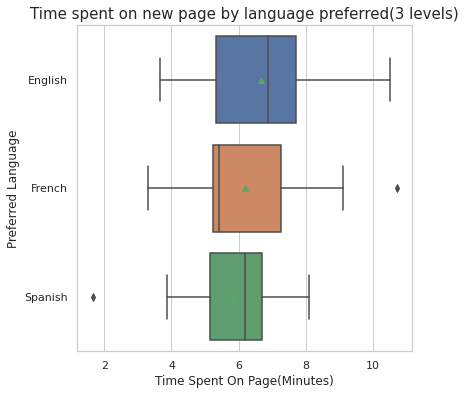

In [39]:
# mean of time spent on new page by each language
new_page_df = e_news[e_news['Landing Page']=='new']
print(new_page_df.groupby('Preferred Language')['Time Spent On Page(Minutes)'].mean())

# draw the boxplot
fig, ax = plt.subplots(figsize=(6,6))
a = sns.boxplot(data=new_page_df, y='Preferred Language', x='Time Spent On Page(Minutes)', showmeans=True)
a.set_title('Time spent on new page by language preferred(3 levels)', fontsize=15)
plt.show()

Normality and equality of variance assumptions need to be checked.

- Shapiro-Wilkes test for normality
- Levene test for equality fo variance

##### Shapiro-Wilkes Test

$H_0:$ Time spent on page follows a normal distribution

$H_1:$ Time spent on page does not follow  a normal distribution

In [40]:
from scipy import stats

# apply the test and find the p-value
w, pval = stats.shapiro(new_page_df['Time Spent On Page(Minutes)'])
print(f'The pvalue is {pval}')

The pvalue is 0.8040016293525696


Since the p-value is very large we fail to reject the null hypothesis that time spent on page follows a normal distribution.

##### Levene's Test

$H_0:$ All populations variances are equal

$H_1:$ At least one variance is different from the rest

In [41]:
# import required test
from scipy.stats import levene

statistic, p_val = levene(new_page_df['Time Spent On Page(Minutes)'][new_page_df['Preferred Language']=='English'],
                        new_page_df['Time Spent On Page(Minutes)'][new_page_df['Preferred Language']=='Spanish'],
                        new_page_df['Time Spent On Page(Minutes)'][new_page_df['Preferred Language']=='French'])

# print the p-value
print(f'The p-value is {p_val}')

The p-value is 0.46711357711340173


The p-value is larger than level of significance therefore we fail to reject the null hypothesis that all population variances are equal.

The assumptions are satisfied.  Samples are independent random samples, populations are normally distributed and population variances are equal.

### Calculate the p-value

In [42]:
# import the required function
from scipy.stats import f_oneway

# perform one way anova test
test_stat, p_value = f_oneway(new_page_df.loc[new_page_df['Preferred Language']=='English', 'Time Spent On Page(Minutes)'],
                             new_page_df.loc[new_page_df['Preferred Language']=='Spanish', 'Time Spent On Page(Minutes)'],
                             new_page_df.loc[new_page_df['Preferred Language']=='French', 'Time Spent On Page(Minutes)'])
print(f'The p_value is {p_value}')

The p_value is 0.43204138694325955


### Compare the p-value with $\alpha$

The p_value is larger then our level of significance.

### Draw inference

We fail to reject the null hypothesis and say that the average time spent on the new page is the same for all language users.

<h5 style='color:red;font-size:30px;font-family:Georgia;text-align:center;'><strong>&#127774;Conclusions & Business Recommendations&#127774;</strong></h5>

<div style='font-family:Georgia;color:#000000;text-align:center;border-radius:10px;border-style:dotted;border-width:5px;border-color:#323232;padding-left:20px;padding-right:20px'>
<br>
    <p style='text-align:center'><strong>Do users spend more time on the new landing page?</strong></p><br>
    There is not enough evidence to prove that users spend more time on the new landing page.  Even though we failed to prove statistically that users spend more time on the new landing page, it would be my recommendation to take further sampling.  The raw average between the time spent on the two pages differs significantly enough to warrant more sampling.  The new landing page produced an additional 1:29 of screen time on average.  If users spending more time on the landing page is a goal, an additional sample might bring that average down closer to the old landing page while still being a significant increase and statistically provable.
    <br>
    <br>
    <p style='text-align:center'><strong>Is the conversion rate for the new landing page greater than for the old landing page?</strong></p><br>
    There is in fact enough statistical evidence to say that the conversion rate for the new landing page is greater than that of the old landing page.  The new landing page also has an above average time spent on the page.  Futher analysis will need to be done with more sampling to say if the increased stickiness of the new page is the main factor driving user conversion or if there are other aspects of the updated page that account for the increased conversion.
    <br>
    <br>
    <p style='text-align:center'><strong>Are conversion and language preferred independent or related?</strong></p><br>
    Our testing confirms that conversion and language preferred are independent of each other.  Language preference does not seem to play a significant role in conversion.  English speakers edge out the other languages being the most likely to convert.  Explore why French and Spanish language preferences result in a lower conversion rate. 
    <br>
    <br>
    <p style='text-align:center'><strong>Is time spent on the new page equal for different language users?</strong></p><br>
    Time spent on the new page is equal for all language users.  Interestingly, Spanish has a tighter interquartile and overall range of time spent on the page.  Perhaps there is something about the Spanish page that is resulting in this difference that needs to be explored.<br>
    <br>
</div>